<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym
!pip3 install box2d
!pip install pyvirtualdisplay

  Using cached Box2D-2.3.2.tar.gz (427 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d
  Running setup.py clean for box2d
Failed to build box2d
ERROR: Could not build wheels for box2d, which is required to install pyproject.toml-based projects


In [4]:
import gym
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
env = gym.make("MountainCar-v0")
print(env.action_space.n)
env.reset()
%matplotlib inline

3


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [10]:
print(env.observation_space.high, env.observation_space.low, env.action_space.n)

[0.6  0.07] [-1.2  -0.07] 3


In [14]:
discrete_observation_space_size = [20] * len(env.observation_space.high)
discrete_observation_win_size = (env.observation_space.high - env.observation_space.low) / discrete_observation_space_size

In [15]:
discrete_observation_space_size, discrete_observation_win_size

([20, 20], array([0.09 , 0.007]))

In [17]:
q_table = np.random.uniform(low=-2, high=0, size=(discrete_observation_space_size + [env.action_space.n]))
print(q_table)

[[[-0.36425475 -1.97878344 -0.37938556]
  [-1.69216064 -0.91098588 -0.90514107]
  [-1.00037874 -0.65382228 -1.98194498]
  ...
  [-0.13656001 -1.72600576 -1.94062929]
  [-0.06773165 -0.02536559 -0.56930314]
  [-0.17729891 -0.61030904 -0.53062572]]

 [[-1.78434106 -0.50317378 -0.47492063]
  [-0.0118003  -0.84848411 -1.54724566]
  [-1.13763746 -1.55846152 -0.15489376]
  ...
  [-0.42846619 -0.19928026 -0.55466174]
  [-0.27640362 -1.81203527 -1.5587498 ]
  [-1.16550437 -1.25567326 -1.31411086]]

 [[-1.69194033 -0.65468184 -1.93450791]
  [-1.11197181 -0.51357518 -1.24516148]
  [-1.21630095 -0.74838161 -1.16935129]
  ...
  [-0.53463493 -1.48583636 -1.36397195]
  [-1.93488282 -0.48102049 -0.87524508]
  [-0.43482701 -0.55852477 -1.93143323]]

 ...

 [[-0.18252777 -1.86697467 -1.95535695]
  [-1.92419436 -0.48862381 -1.903419  ]
  [-1.99189132 -1.13136667 -1.86978709]
  ...
  [-1.84233791 -0.78284601 -0.50681369]
  [-0.42606577 -0.07328119 -1.2999645 ]
  [-0.80109397 -0.13712737 -1.74795521]]

 [

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


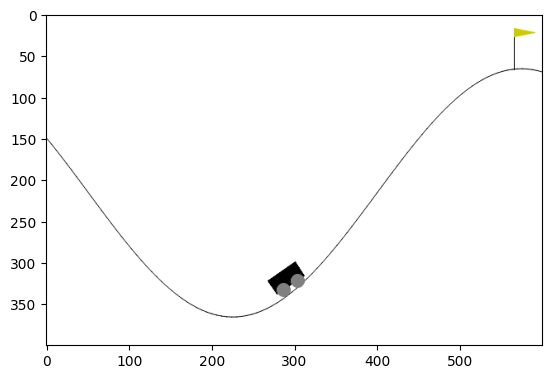

In [6]:
done = False
while not done:
    action = 2  # always go right!
    new_state, reward, done, _ = env.step(action)
    print(reward, new_state)
    env.render()
    %matplotlib inline
    clear_output(wait=True)
    plt.imshow( env.render(mode='rgb_array') )
    plt.show()
env.close()